## 1.Introduction

Welcome to this comprehensive analysis of mutual funds, where we delve into the intricate relationships between fund size, returns, and environmental, social, and governance (ESG) risk levels. In this research endeavor, we aim to provide valuable insights into the dynamics that drive mutual fund performance and risk considerations.

Throughout this notebook, we explore how different fund sizes impact investment returns and how ESG risk factors influence decision-making within the mutual fund industry.

By examining both the historical returns of mutual funds and their commitment to sustainable investing, we seek to shed light on the potential trade-offs and advantages associated with various fund sizes.

Throughout this notebook, we will leverage Python's powerful data manipulation and visualization libraries, such as pandas, matplotlib, numpy, and seaborn, to analyze and visualize the US Mutual Funds dataset.


### 1.1 Notebook Content


* 1. Introduction
* 2. Basic Setup
* 3. MF size and Financial Performance trends 
     * 3.1 MF size and Return Trends
     * 3.2 MF size and Alpha
     * 3.3 MF size and Beta 
     * 3.4 MF size and Sharpe Ratio
     * 3.5 MF size and ESG Risk 
* 4. Findings Summary    



## 2.Basic Setup 

### 2.1 Libraries Importation

In [2]:
# Import all necessary libraries  
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for creating plots and visualizations 
import numpy as np # used for numerical computing. It provides efficient arrays and mathematical functions for working with large datasets
import seaborn as sns # is built on top of matplotlib, used for high-level data visualization 
import warnings 
#import xarray as xr # used for working with labeled multi-dimensional arrays


### 2.2 Loading the Dataset

In [3]:
df_mutual_funds= pd.read_csv('~/dataset-yahoo-finance-ETF-MF/MutualFunds.csv', header=0)

## 3.MF size and Financial Performance trends 

### 3.1 MF size and Return Trends  

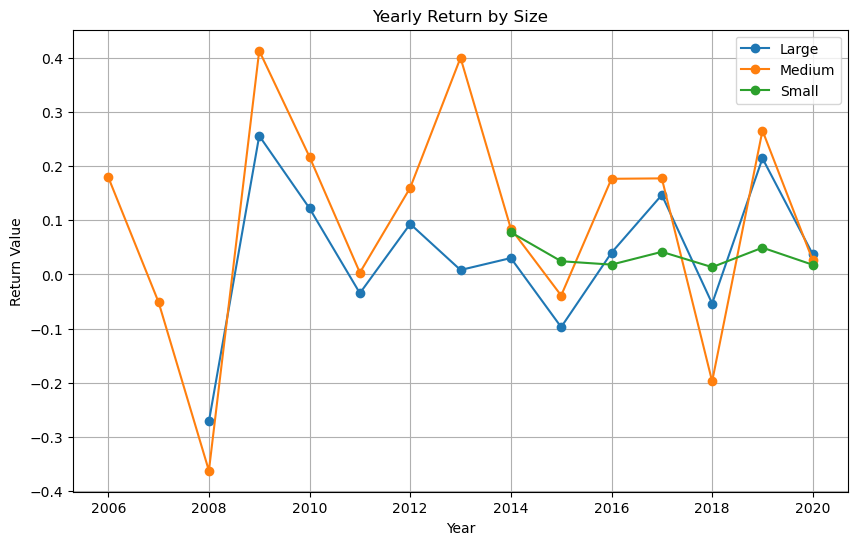

In [6]:

# Group the data by Size
grouped_data = df_mutual_funds.groupby('size_type')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    if len(group) > 23782:
        group = group.head(23782)
        
    years = []
    returns = []
    
    for col in group.columns:
        if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Size')
plt.legend()
plt.grid(True)

plt.show()


According to the line graph, mutual funds of medium size generally demonstrate higher returns compared to both larger and smaller funds. Despite this, medium-sized mutual funds experienced the lowest levels of return during both the 2008 Financial Crisis and the 2020 COVID crisis.

### 3.2 MF size and Alpha (Outperformance : the higher , the better )

In [ ]:

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_alpha_3years
df_mutual_funds.boxplot(column='fund_alpha_3years', by='size_type', ax=axs[0])
axs[0].set_title('Alpha - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Alpha')
axs[0].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_5years
df_mutual_funds.boxplot(column='fund_alpha_5years', by='size_type', ax=axs[1])
axs[1].set_title('Alpha - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Alpha')
axs[1].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_10years
df_mutual_funds.boxplot(column='fund_alpha_10years', by='size_type', ax=axs[2])
axs[2].set_title('Alpha - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Alpha')
axs[2].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()


### 3.3 MF size and Beta (Market Risk : the lower , the better)

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_beta_3years', by='size_type', ax=axs[0])
axs[0].set_title('Beta - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Beta')
axs[0].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_beta_5years', by='size_type', ax=axs[1])
axs[1].set_title('Beta - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Beta')
axs[1].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_beta_10years', by='size_type', ax=axs[2])
axs[2].set_title('Beta - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Beta')
axs[2].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

### 3.4 MF SIze and Sharpe Ratio (Benchmark : the higher , the better)

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_3years', by='size_type', ax=axs[0])
axs[0].set_title('Sharpe ratio - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Sharpe ratio')
axs[0].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_5years', by='size_type', ax=axs[1])
axs[1].set_title('Sharpe ratio - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Sharpe ratio')
axs[1].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_10years', by='size_type', ax=axs[2])
axs[2].set_title('Sharpe - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Sharpe ratio')
axs[2].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

### 3.5 MF size and ESG Risk

<Axes: title={'center': 'esg_score'}, xlabel='size_type'>

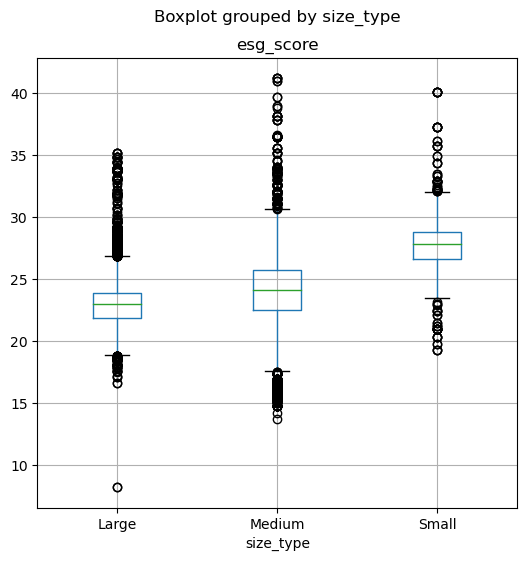

In [17]:
df_mutual_funds.boxplot(column='esg_score',by='size_type',figsize=(6,6))

The box plot illustrates that medium and large mutual funds have a lower median ESG risk level when compared to smaller mutual funds. This indicates that, on average, medium and large funds tend to adopt investment strategies with lower environmental, social, and governance (ESG) risk exposure compared to their smaller counterparts. The result suggests that medium and large funds are more likely to incorporate ESG considerations into their investment decisions, aligning with the growing trend of responsible and sustainable investing in the financial industry.

## 4.Findings Summary  

In this comprehensive analysis of mutual funds, we explored the relationships between fund size, returns, and environmental, social, and governance (ESG) risk levels. 

The line graph revealed that, in general, medium-sized mutual funds tend to exhibit higher returns compared to both larger and smaller funds. However, a noteworthy observation was made during significant market downturns such as the 2008 Financial Crisis and the 2020 COVID crisis, where medium-sized mutual funds experienced the lowest levels of return. This emphasizes the importance of considering market volatility and economic uncertainties when evaluating investment performance.

Moreover, the box plot analysis focused on ESG risk levels among different fund sizes. The results indicated that medium and large mutual funds tend to have a lower median ESG risk level compared to smaller funds. This suggests that, on average, medium and large funds are more inclined to adopt investment strategies that consider environmental, social, and governance factors in their decision-making process. 

By combining the insights from the line graph and the box plot, investors can gain a more comprehensive understanding of the potential trade-offs and advantages associated with different fund sizes and their risk profiles. 

It highlights the need for a well-balanced approach to portfolio construction, taking into account factors like fund size, historical performance, and ESG risk levels. 